# Pan-cancer gene prediction using Autoencoders

In [1]:
!wget https://github.com/greenelab/tybalt/raw/refs/heads/master/data/pancan_scaled_zeroone_rnaseq.tsv.gz

--2025-02-05 16:28:59--  https://github.com/greenelab/tybalt/raw/refs/heads/master/data/pancan_scaled_zeroone_rnaseq.tsv.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/greenelab/tybalt/refs/heads/master/data/pancan_scaled_zeroone_rnaseq.tsv.gz [following]
--2025-02-05 16:28:59--  https://media.githubusercontent.com/media/greenelab/tybalt/refs/heads/master/data/pancan_scaled_zeroone_rnaseq.tsv.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417090791 (398M) [application/octet-stream]
Saving to: ‘pancan_scaled_zeroone_rnaseq.tsv.gz’

pancan_scaled_zeroo 100%[================

In [4]:
!gunzip pancan_scaled_zeroone_rnaseq.tsv.gz

In [5]:
!ls -lh

total 885M
-rw-r--r-- 1 root root 885M Feb  5 16:27 pancan_scaled_zeroone_rnaseq.tsv
drwxr-xr-x 1 root root 4.0K Feb  3 14:20 sample_data


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [11]:
# Load RNAseq data
pancan_rnaseq_df = pd.read_csv('pancan_scaled_zeroone_rnaseq.tsv', index_col=0, sep="\t", low_memory=False)
pancan_rnaseq_df.iloc[:5,:10]

,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D
TCGA-02-0047-01,0.678296,0.289910,0.034230,0.0,0.000000,0.084731,0.031863,0.037709,0.746797,0.687833
TCGA-02-0055-01,0.200633,0.654917,0.181993,0.0,0.000000,0.100606,0.050011,0.092586,0.103725,0.140642
TCGA-02-2483-01,0.785980,0.140842,0.081082,0.0,0.000000,0.000000,0.000000,0.000000,0.730648,0.657189
TCGA-02-2485-01,0.720258,0.122554,0.180042,0.0,0.000000,0.000000,0.000000,0.000000,0.720306,0.719855
TCGA-02-2486-01,0.767127,0.210393,0.034017,0.0,0.061161,0.000000,0.053021,0.000000,0.739546,0.665684


In [12]:
# Train Test split
pancan_rnaseq_df_train, pancan_rnaseq_df_test = train_test_split(pancan_rnaseq_df, test_size=0.1, shuffle=True)
pancan_rnaseq_df_train.shape, pancan_rnaseq_df_test.shape

((9413, 5000), (1046, 5000))

In [13]:
# This is the size of our encoded representations
encoding_dim = 100
numb_of_features = pancan_rnaseq_df.shape[1]

# Defining the 'Autoencoder' full model
autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, activation="relu", input_shape=(numb_of_features, )))
autoencoder.add(Dense(numb_of_features, activation="sigmoid"))
autoencoder.compile(optimizer="adam", loss='mse')
autoencoder.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │         500,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5000)                │         505,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,005,100 (3.83 MB)

 Trainable params: 1,005,100 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
%%time
hist = autoencoder.fit(np.array(pancan_rnaseq_df_train), np.array(pancan_rnaseq_df_train),
                       shuffle=True,
                       epochs=10,
                       batch_size=50,
                       validation_split=0.2)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0376 - val_loss: 0.0176
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0163 - val_loss: 0.0144
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0138 - val_loss: 0.0130
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0109 - val_loss: 0.0110
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0107 - val_loss: 0.0108
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0105 - val_loss: 0.0107
Epoch 10/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - val_loss: 0.0106
CPU times: user 11.8 s, sys: 1.75 s, total: 13.6 s
Wall time: 15.6 s


Text(0, 0.5, 'Reconstruction Loss')

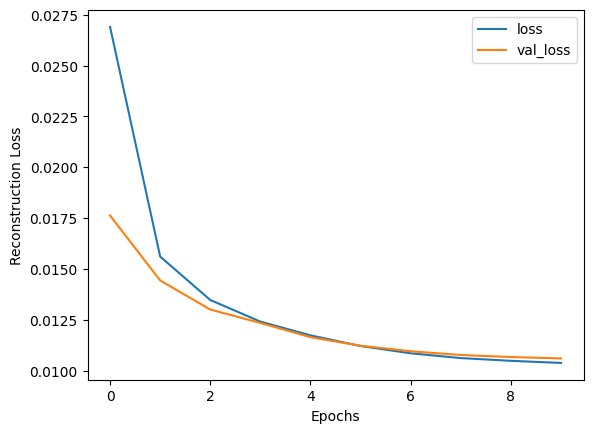

In [15]:
# Visualize training performance
history_df = pd.DataFrame(hist.history)
ax = history_df.plot()
ax.set_xlabel('Epochs')
ax.set_ylabel('Reconstruction Loss')

In [22]:
input_sample = pancan_rnaseq_df_test[:1]
input_sample

,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D,...,FAM129A,C8orf48,CDK5R1,FAM81A,C13orf18,GDPD3,SMAGP,C2orf85,POU5F1B,CHST2
TCGA-TT-A6YK-01,0.741189,0.472121,0.031342,0.0,0.0,0.0,0.029175,0.034528,0.809121,0.775398,...,0.563805,0.303502,0.610189,0.471833,0.304216,0.464549,0.441397,0.210576,0.122191,0.610272


In [23]:
reconstruction = autoencoder.predict([input_sample])
reconstruction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 5000))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


array([[0.7542398 , 0.21712548, 0.05747525, ..., 0.08458409, 0.1563852 ,
        0.5107738 ]], dtype=float32)

In [24]:
# Reconstruct input RNAseq
reconstruction = autoencoder.predict(np.array(pancan_rnaseq_df))

reconstructed_df = pd.DataFrame(reconstruction, index=pancan_rnaseq_df.index,
                                columns=pancan_rnaseq_df.columns)

reconstructed_df.head()

327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D,...,FAM129A,C8orf48,CDK5R1,FAM81A,C13orf18,GDPD3,SMAGP,C2orf85,POU5F1B,CHST2
TCGA-02-0047-01,0.776876,0.149566,0.168967,0.034318,0.021365,0.052984,0.055237,0.034872,0.792558,0.743771,...,0.440977,0.539486,0.760478,0.680876,0.606842,0.347454,0.428867,0.463581,0.191005,0.638839
TCGA-02-0055-01,0.267670,0.416932,0.283825,0.144346,0.059646,0.211007,0.184651,0.099647,0.234141,0.171949,...,0.573190,0.556445,0.598646,0.592675,0.630622,0.312417,0.518800,0.190067,0.152425,0.657965
TCGA-02-2483-01,0.822484,0.181977,0.133116,0.035897,0.024494,0.057207,0.041432,0.039169,0.804173,0.762089,...,0.375834,0.470730,0.734385,0.489453,0.515229,0.405701,0.468037,0.449499,0.238220,0.588433
TCGA-02-2485-01,0.697845,0.212707,0.129232,0.058917,0.015392,0.037313,0.048104,0.021634,0.685251,0.628892,...,0.476781,0.543791,0.689486,0.630262,0.594706,0.331488,0.494046,0.438209,0.197457,0.651467
TCGA-02-2486-01,0.767562,0.102840,0.154955,0.076583,0.016218,0.061423,0.056198,0.038054,0.758729,0.703250,...,0.599011,0.558993,0.570820,0.577368,0.686030,0.331242,0.460334,0.237042,0.168833,0.649026


In [25]:
reconstruction_fidelity = reconstructed_df - pancan_rnaseq_df

gene_mean = reconstruction_fidelity.mean(axis=0)
gene_abssum = reconstruction_fidelity.abs().sum(axis=0).divide(pancan_rnaseq_df.shape[0])
gene_summary = pd.DataFrame([gene_mean, gene_abssum], index=['gene mean', 'gene abs(sum)']).T
gene_summary.sort_values(by='gene abs(sum)', ascending=False).head()

,gene mean,gene abs(sum)
PPAN-P2RY11,0.005654,0.233059
GSTT1,-0.005163,0.222376
GSTM1,-0.023286,0.217993
TBC1D3G,0.015670,0.197827
RPS28,0.006202,0.172508


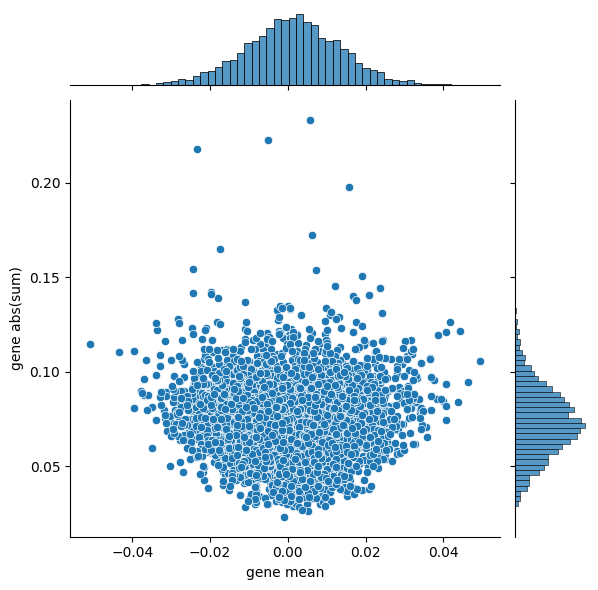

In [29]:
# Mean of gene reconstruction vs. absolute reconstructed difference per sample
g = sns.jointplot(data=gene_summary, x='gene mean', y='gene abs(sum)')

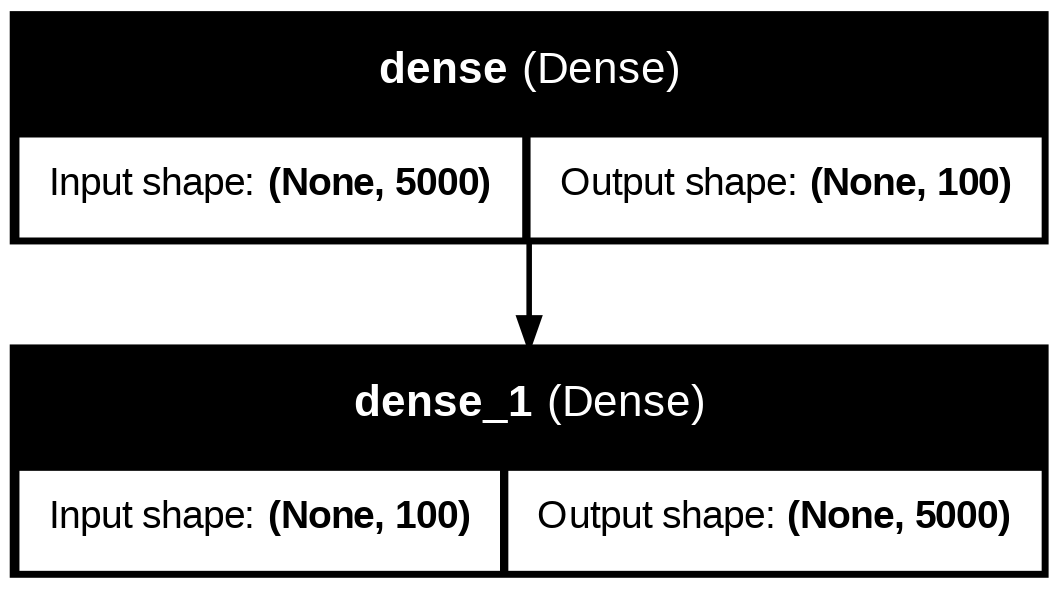

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True, show_layer_names=True)